In [1]:
#!pip install wfdb
#!pip install datasets
#os.chdir('/Users/naubergois/ECGProject/')

In [2]:
import wfdb 
from scipy import signal as ss
record = wfdb.rdsamp('./Dados/100')
annotation = wfdb.rdann('./Dados/100', 'atr')

In [3]:
normal = [100,101,103,105,106,112,113,114,115,116,117,121,122,123,201,202,205,209,213,215,219,220,222,234]
abnormal = [104,108,109,111,118,119,124,200,203,207,208,210,212,214,217,221,223,228,230,231,232]


In [4]:
len(record[0])

650000

In [5]:
record

(array([[-0.145, -0.065],
        [-0.145, -0.065],
        [-0.145, -0.065],
        ..., 
        [-0.675, -0.365],
        [-0.765, -0.335],
        [-1.28 ,  0.   ]]),
 {'base_date': None,
  'base_time': None,
  'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'],
  'fs': 360,
  'n_sig': 2,
  'sig_len': 650000,
  'sig_name': ['MLII', 'V5'],
  'units': ['mV', 'mV']})

In [6]:
record_=record[1]

In [7]:
print 'Sampling frequency used for this record:', record_['fs']


Sampling frequency used for this record: 360


In [8]:
data = record[0]
print data
channel = data[:, 0]

[[-0.145 -0.065]
 [-0.145 -0.065]
 [-0.145 -0.065]
 ..., 
 [-0.675 -0.365]
 [-0.765 -0.335]
 [-1.28   0.   ]]


In [9]:
print data[:,1]

[-0.065 -0.065 -0.065 ..., -0.365 -0.335  0.   ]


In [10]:
from matplotlib import pyplot as plt

In [11]:
howmany = 2000

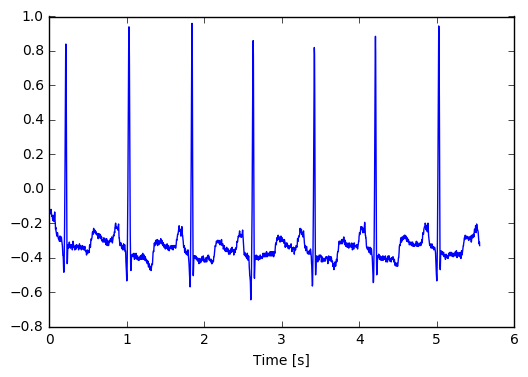

In [12]:
import numpy as np
times = np.arange(howmany, dtype = 'float') / record_['fs']
plt.plot(times, channel[ : howmany])
plt.xlabel('Time [s]')
plt.show()

In [13]:
def get_ecg_data(datfile): 
    ## convert .dat/q1c to numpy arrays
    recordname=os.path.basename(datfile).split(".dat")[0]
    recordpath=os.path.dirname(datfile)
    #cwd=os.getcwd()
    #os.chdir(recordpath) ## somehow it only works if you chdir. 

    
    annotation = wfdb.rdann('./Dados/'+recordname, 'atr')  
    record = wfdb.rdsamp('./Dados/'+recordname)
    
    record_=record[1]
    data = record[0]
    #print data
    channel = data[:, 0]
    
    
    #times = np.arange(howmany, dtype = 'float') / record_['fs']
    #plt.plot(times, channel[ : howmany])
    #plt.xlabel('Time [s]')
    #plt.show()
   
    return  data,annotation



In [14]:
def LoaddDatFiles(datfiles):  
    print "Teste"
    
    
    sinais = []
    target=[]  
        
    for datfile in datfiles:
        
        
       
      
        x,y=get_ecg_data(datfile)
      
         

        try: 

                sinais.append(x)
                target.append(y)
       
        except NameError: 
                xx = x
                yy = y
    return sinais,target

In [15]:


    
    
    
def good_types():
    """ Of annotations """
    # www.physionet.org/physiobank/annotations.shtml
    good = ['N']
    
    #, 'L', 'R', 'B', 'A',
    #        'a', 'J', 'S', 'V', 'r',
    #        'F', 'e', 'j', 'n', 'E',
    #        '/', 'f', 'Q', '?']

    return good

def good_annotations():
    """ Const function with good annotations """
    # For now it seems those are most popular
    good_annotations = [1, 2, 3, 4,
                        5, 6, 7, 8,
                        9, 10, 11, 12,
                        13, 16, 31, 38]

    return good_annotations



def beat_annotations(annotation):
    """ Get rid of non-beat markers """
    # Declare beat types
    good = good_types()
    ids = np.in1d(annotation.symbol, good)
    ids_bad= np.in1d(annotation.symbol, good,invert=True)
    
    #print "IDS BAD"

    #print ids_bad

    # We want to know only the positions
    beats = annotation.sample[ids]
    bad_beats = annotation.sample[ids_bad]
    
    #print bad_beats

    return beats,bad_beats






In [16]:
def get_dataset(XX,yy):
    
    contador=0
    
    w, h = 480000, 8000;
    df = [] 
    
    print "Teste"

    contador=0
    
    contador_1=0
    
    for sinal in XX:
        
        anotacoes=yy[contador]
        
        
        
        good,bad=beat_annotations(anotacoes)
        
           
                
        good_signal=sinal[good]
        
        coluna=1   
        
        line=[]
        line.append(1)
    

        
        for good_signal_aux in good_signal:
            line.append(good_signal_aux[0])
            
        df.append(line) 
        
        
        bad_signal=sinal[bad]
        
        
        line=[]
        line.append(0)
        
        
        for bad_signal_aux in bad_signal:
            line.append(bad_signal_aux[0])

        df.append(line)


        contador=contador+1
        
    return df
            
                    
                
        




In [17]:
def imprime_sinal(XX):
    
            
                    
                
        channel = XX
                    
        
        print "Canal 0"
        
        howmany=len(channel)
        
        times = np.arange(howmany, dtype = 'float') /360
        plt.plot(times, channel[ : howmany])
        plt.xlabel('Time [s]')
        plt.show()
        
        



In [18]:
import glob, os
from os.path import basename
datfiles=glob.glob("./Dados/"+"*.dat")
perct=0.81



In [46]:
xxt,yyt=LoaddDatFiles(datfiles[ :int(round(len(datfiles)*perct))]) # training data. 

Teste


In [47]:
len(xxt)

37

In [48]:
len(xxt[0])

650000

In [49]:
df=get_dataset(xxt,yyt)
df

Teste


[[1,
  1.9650000000000001,
  2.1749999999999998,
  1.9750000000000001,
  1.8999999999999999,
  2.0550000000000002,
  1.8799999999999999,
  1.825,
  1.8200000000000001,
  1.8200000000000001,
  1.8600000000000001,
  1.9550000000000001,
  1.79,
  1.8300000000000001,
  1.915,
  1.74,
  1.8300000000000001,
  1.905,
  1.8300000000000001,
  1.845,
  1.79,
  1.855,
  1.7749999999999999,
  1.895,
  1.825,
  1.925,
  1.9350000000000001,
  1.9850000000000001,
  1.865,
  1.96,
  1.845,
  1.9850000000000001,
  1.9099999999999999,
  1.8700000000000001,
  1.7649999999999999,
  1.9299999999999999,
  1.95,
  1.9650000000000001,
  1.96,
  2.0600000000000001,
  1.9650000000000001,
  1.9750000000000001,
  1.9399999999999999,
  1.99,
  2.04,
  2.0600000000000001,
  1.9450000000000001,
  2.1099999999999999,
  1.98,
  2.0049999999999999,
  1.8600000000000001,
  2.1499999999999999,
  1.79,
  2.0150000000000001,
  1.885,
  1.905,
  1.865,
  1.855,
  2.0499999999999998,
  1.8899999999999999,
  2.009999999999999

In [50]:
type(df)

list

In [67]:
import pandas as pd
df1= pd.DataFrame(df)

In [68]:
df1

0      1      2      3      4      5      6      7      8      9     \
0      1  1.965  2.175  1.975  1.900  2.055  1.880  1.825  1.820  1.820   
1      0 -0.225  2.215  2.160  2.300  2.145  2.590  2.540  2.330  2.370   
2      1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3      0 -0.200  0.815 -0.930  0.900 -1.080  0.775 -0.995  0.770 -1.105   
4      1  1.795  1.550  1.535  1.905  1.755  1.595  1.550  1.400  1.655   
5      0 -0.245  1.295  1.305  1.205  0.970  1.250  1.190  1.135  0.955   
6      1  1.080  1.035  0.960  0.850  1.005  1.040  1.005  0.950  1.030   
7      0 -0.055 -0.935 -1.000 -0.590 -0.480 -0.920 -0.930  1.030 -0.785   
8      1  0.735  0.805  0.800  0.715  0.765  0.710  0.855  0.755  0.730   
9      0 -0.455 -1.910 -1.680  0.720 -0.315 -1.710 -1.315 -1.475 -1.390   
10     1  0.835  0.945  1.005  0.910  1.010  0.890  0.715  0.820  0.810   
11     0 -0.290  0.360  0.745  0.760 -0.320  0.750  0.870 -0.225  0.965   
12     1  0.800  0.765  0.680  0.495  0.510  0.590  0.730  0.630  0.625   
13     0 -0.160  1.245  2.115  1.580  1.160  1.225  2.345  1.500  1.670   
14     1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
15     0 -0.150  2.055  2.050  2.000  1.920  2.000  2.015  1.960  0.990   
16     1  1.060  0.995  1.050  0.895  1.095  0.790  0.905  0.605  0.725   
17     0 -0.130 -1.490 -2.010 -2.080 -2.090 -1.915 -2.155 -1.940 -2.245   
18     1  0.550  0.315  0.495  0.545  0.445  0.475  0.485  0.385  0.535   
19     0 -0.305 -0.130  0.295  0.050  0.085  2.415  2.290  2.315  2.215   
20     1  1.415  1.465  1.410  1.480  1.350  1.370  1.325  1.245  1.285   
21     0 -0.065  0.100  0.030  0.110  0.130  0.195  1.075  0.135  0.200   
22     1  1.345  1.715  1.455  1.145  0.815  1.125  1.465  1.900  1.620   
23     0 -0.310 -0.220 -1.115 -1.430 -0.175 -0.465 -1.115 -0.690 -1.355   
24     1  1.265  1.045  0.940  1.005  1.015  1.245  1.195  1.285  1.445   
25     0 -0.215  0.590  0.555  0.535  0.565  0.535  0.955  0.225  0.310   
26     1  2.010  1.995  2.030  2.010  1.940  1.935  2.075  1.845  1.915   
27     0 -0.040 -0.345 -0.285 -0.340  0.230  1.180  1.340  1.135  1.400   
28     1 -0.045 -0.055 -0.145 -0.115 -0.185 -0.095 -0.060 -0.120 -0.240   
29     0 -0.770 -1.045 -0.450 -0.135 -0.670  0.010 -1.060 -0.790 -0.965   
..   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
44     1  1.065  1.020  1.165  1.095  1.100  1.000  1.065  1.375  1.305   
45     0 -0.345 -0.220  0.435 -0.515 -0.710  0.840 -2.720 -0.895 -0.335   
46     1  1.470  1.485  1.635  1.595  1.295  1.585  1.560  1.580  1.600   
47     0 -0.605 -0.335 -0.515 -0.350 -0.395 -0.515 -0.550 -0.610 -0.180   
48     1  1.850  1.750  1.685  1.770  1.820  1.875  1.700  1.825  1.785   
49     0 -0.345 -0.490  0.455 -1.020  1.745 -0.170 -0.060  1.500 -0.170   
50     1 -1.755 -1.665 -1.860 -1.475 -1.670 -1.875 -1.715 -1.750 -1.640   
51     0 -0.950 -0.990 -0.940 -1.525 -1.625    NaN    NaN    NaN    NaN   
52     1  1.255  2.315  2.435  2.225  2.120  2.240  1.990  2.065  2.285   
53     0 -1.300  2.610  2.510  2.410  2.570  2.545  2.820  2.590  2.535   
54     1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
55     0 -0.885  0.110  0.280  0.245  0.175  0.205  0.130  0.180  0.185   
56     1  1.205  1.145  1.170  1.110  1.165  1.205  1.345  1.280  1.265   
57     0 -1.020  1.885  1.935  1.945 -0.415  2.140  2.155  2.220  2.225   
58     1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
59     0  0.085  0.535  0.365  0.555  0.140  0.115  0.325  0.475  0.685   
60     1  0.265  0.180 -0.080  0.160  0.435  0.245  0.410  0.425  0.210   
61     0 -0.810 -1.150 -1.895  0.005 -1.655 -1.370 -0.220 -0.905 -0.570   
62     1 -0.980 -0.935 -0.915 -0.945 -0.915 -0.955 -1.000 -0.975 -1.020   
63     0 -0.405  0.130 -0.455 -0.320 -0.385  1.050 -0.165 -0.310 -0.225   
64     1  0.855  0.795  0.710  0.700  0.680  0.630  0.685  0.725  0.770   
65     0 -0.745 -1.145 -1.975

Canal 0


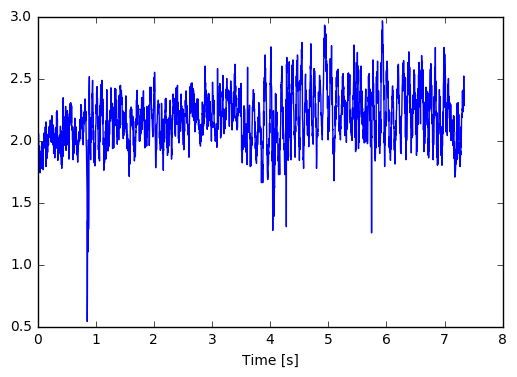

In [69]:
imprime_sinal(df1.iloc[0,:])

In [70]:
y=df1.iloc[:,0]

In [71]:
y

0     1
1     0
2     1
3     0
4     1
5     0
6     1
7     0
8     1
9     0
10    1
11    0
12    1
13    0
14    1
15    0
16    1
17    0
18    1
19    0
20    1
21    0
22    1
23    0
24    1
25    0
26    1
27    0
28    1
29    0
     ..
44    1
45    0
46    1
47    0
48    1
49    0
50    1
51    0
52    1
53    0
54    1
55    0
56    1
57    0
58    1
59    0
60    1
61    0
62    1
63    0
64    1
65    0
66    1
67    0
68    1
69    0
70    1
71    0
72    1
73    0
Name: 0, Length: 74, dtype: int64

In [72]:
X=df1.drop(df1.columns[0], axis=1)

In [73]:
X


1      2      3      4      5      6      7      8      9      10    \
0   1.965  2.175  1.975  1.900  2.055  1.880  1.825  1.820  1.820  1.860   
1  -0.225  2.215  2.160  2.300  2.145  2.590  2.540  2.330  2.370  2.395   
2     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3  -0.200  0.815 -0.930  0.900 -1.080  0.775 -0.995  0.770 -1.105  0.750   
4   1.795  1.550  1.535  1.905  1.755  1.595  1.550  1.400  1.655  1.720   
5  -0.245  1.295  1.305  1.205  0.970  1.250  1.190  1.135  0.955  1.110   
6   1.080  1.035  0.960  0.850  1.005  1.040  1.005  0.950  1.030  0.955   
7  -0.055 -0.935 -1.000 -0.590 -0.480 -0.920 -0.930  1.030 -0.785 -1.170   
8   0.735  0.805  0.800  0.715  0.765  0.710  0.855  0.755  0.730  0.760   
9  -0.455 -1.910 -1.680  0.720 -0.315 -1.710 -1.315 -1.475 -1.390 -1.545   
10  0.835  0.945  1.005  0.910  1.010  0.890  0.715  0.820  0.810  0.725   
11 -0.290  0.360  0.745  0.760 -0.320  0.750  0.870 -0.225  0.965  0.130   
12  0.800  0.765  0.680  0.495  0.510  0.590  0.730  0.630  0.625  0.425   
13 -0.160  1.245  2.115  1.580  1.160  1.225  2.345  1.500  1.670  0.795   
14    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
15 -0.150  2.055  2.050  2.000  1.920  2.000  2.015  1.960  0.990  2.070   
16  1.060  0.995  1.050  0.895  1.095  0.790  0.905  0.605  0.725  0.665   
17 -0.130 -1.490 -2.010 -2.080 -2.090 -1.915 -2.155 -1.940 -2.245 -0.185   
18  0.550  0.315  0.495  0.545  0.445  0.475  0.485  0.385  0.535  0.380   
19 -0.305 -0.130  0.295  0.050  0.085  2.415  2.290  2.315  2.215  2.495   
20  1.415  1.465  1.410  1.480  1.350  1.370  1.325  1.245  1.285  1.285   
21 -0.065  0.100  0.030  0.110  0.130  0.195  1.075  0.135  0.200  0.230   
22  1.345  1.715  1.455  1.145  0.815  1.125  1.465  1.900  1.620  1.530   
23 -0.310 -0.220 -1.115 -1.430 -0.175 -0.465 -1.115 -0.690 -1.355 -0.065   
24  1.265  1.045  0.940  1.005  1.015  1.245  1.195  1.285  1.445  0.720   
25 -0.215  0.590  0.555  0.535  0.565  0.535  0.955  0.225  0.310  0.305   
26  2.010  1.995  2.030  2.010  1.940  1.935  2.075  1.845  1.915  1.870   
27 -0.040 -0.345 -0.285 -0.340  0.230  1.180  1.340  1.135  1.400  0.795   
28 -0.045 -0.055 -0.145 -0.115 -0.185 -0.095 -0.060 -0.120 -0.240 -0.195   
29 -0.770 -1.045 -0.450 -0.135 -0.670  0.010 -1.060 -0.790 -0.965 -1.090   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
44  1.065  1.020  1.165  1.095  1.100  1.000  1.065  1.375  1.305  1.220   
45 -0.345 -0.220  0.435 -0.515 -0.710  0.840 -2.720 -0.895 -0.335  0.500   
46  1.470  1.485  1.635  1.595  1.295  1.585  1.560  1.580  1.600  1.540   
47 -0.605 -0.335 -0.515 -0.350 -0.395 -0.515 -0.550 -0.610 -0.180    NaN   
48  1.850  1.750  1.685  1.770  1.820  1.875  1.700  1.825  1.785  1.840   
49 -0.345 -0.490  0.455 -1.020  1.745 -0.170 -0.060  1.500 -0.170    NaN   
50 -1.755 -1.665 -1.860 -1.475 -1.670 -1.875 -1.715 -1.750 -1.640 -1.555   
51 -0.950 -0.990 -0.940 -1.525 -1.625    NaN    NaN    NaN    NaN    NaN   
52  1.255  2.315  2.435  2.225  2.120  2.240  1.990  2.065  2.285  1.640   
53 -1.300  2.610  2.510  2.410  2.570  2.545  2.820  2.590  2.535  2.525   
54    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
55 -0.885  0.110  0.280  0.245  0.175  0.205  0.130  0.180  0.185  0.245   
56  1.205  1.145  1.170  1.110  1.165  1.205  1.345  1.280  1.265  1.145   
57 -1.020  1.885  1.935  1.945 -0.415  2.140  2.155  2.220  2.225  1.985   
58    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
59  0.085  0.535  0.365  0.555  0.140  0.115  0.325  0.475  0.685  0.400   
60  0.265  0.180 -0.080  0.160  0.435  0.245  0.410  0.425  0.210  0.080   
61 -0.810 -1.150 -1.895  0.005 -1.655 -1.370 -0.220 -0.905 -0.570 -1.190   
62 -0.980 -0.935 -0.915 -0.945 -0.915 -0.955 -1.000 -0.975 -1.020 -1.065   
63 -0.405  0.130 -0.455 -0.320 -0.385  1.050 -0.165 -0.310 -0.225 -0.240   
64  0.855  0.795  0.710  0.700  0.680  0.630  0.685  

In [74]:
X=np.nan_to_num(X)

In [75]:
X

array([[ 1.965,  2.175,  1.975, ...,  0.   ,  0.   ,  0.   ],
       [-0.225,  2.215,  2.16 , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ..., 
       [-0.095, -2.23 , -1.655, ...,  0.   ,  0.   ,  0.   ],
       [ 1.565,  1.535,  1.51 , ...,  0.   ,  0.   ,  0.   ],
       [-0.275,  1.52 ,  1.585, ...,  0.   ,  0.   ,  0.   ]])

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.33, random_state=42)

In [90]:
from sklearn import svm

In [91]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

In [92]:
clf.score(X_test, y_test) 

0.92000000000000004

In [93]:
from sklearn.metrics import confusion_matrix

In [94]:
y_pred=clf.predict(X_test)

In [95]:
confusion_matrix(y_test, y_pred)

array([[11,  2],
       [ 0, 12]])

In [96]:
X_train.shape

(49, 3195)

In [97]:


import numpy

from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import Dropout
from keras.layers import MaxPooling1D
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import GlobalAveragePooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [98]:
model = Sequential()
model.add(Dense(1500, input_dim=3195, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs=20,   batch_size=128)
score = model.evaluate(X_test, y_test, batch_size=128)

Epoch 1/20
49/49 [==============================] - 1s - loss: 0.8020 - acc: 0.4286
Epoch 2/20
49/49 [==============================] - 0s - loss: 0.8512 - acc: 0.6531
Epoch 3/20
49/49 [==============================] - 0s - loss: 3.0068 - acc: 0.5306
Epoch 4/20
49/49 [==============================] - 0s - loss: 0.9696 - acc: 0.6735
Epoch 5/20
49/49 [==============================] - 0s - loss: 1.4473 - acc: 0.6939
Epoch 6/20
49/49 [==============================] - 0s - loss: 1.2978 - acc: 0.7959
Epoch 7/20
49/49 [==============================] - 0s - loss: 0.8728 - acc: 0.7143
Epoch 8/20
49/49 [==============================] - 0s - loss: 1.6089 - acc: 0.6735
Epoch 9/20
49/49 [==============================] - 0s - loss: 0.4869 - acc: 0.7755
Epoch 10/20
49/49 [==============================] - 0s - loss: 1.0555 - acc: 0.7755
Epoch 11/20
49/49 [==============================] - 0s - loss: 1.0035 - acc: 0.9184
Epoch 12/20
49/49 [==============================] - 0s - loss: 0.9770 - a

In [124]:
import keras
X_3d = np.expand_dims(X, axis=2)
y_categorical=keras.utils.to_categorical(y, num_classes=2)
X_train,X_test,y_train,y_test=train_test_split(X_3d, y, test_size=0.33, random_state=42)

In [136]:
model = Sequential()
model.add(Conv1D(64, 3,  activation='relu', input_shape=(3195,1)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(1500, input_dim=3195, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 100, batch_size = 20)     

Epoch 1/100
49/49 [==============================] - 4s - loss: 0.6935 - acc: 0.4694     
Epoch 2/100
49/49 [==============================] - 2s - loss: 0.6936 - acc: 0.4694     
Epoch 3/100
49/49 [==============================] - 2s - loss: 0.6926 - acc: 0.5102     
Epoch 4/100
49/49 [==============================] - 2s - loss: 0.6909 - acc: 0.5102     
Epoch 5/100
49/49 [==============================] - 2s - loss: 0.6727 - acc: 0.5102     
Epoch 6/100
49/49 [==============================] - 2s - loss: 0.6697 - acc: 0.5102     
Epoch 7/100
49/49 [==============================] - 2s - loss: 0.6458 - acc: 0.5102     
Epoch 8/100
49/49 [==============================] - 2s - loss: 0.6586 - acc: 0.5714     
Epoch 9/100
49/49 [==============================] - 2s - loss: 0.6281 - acc: 0.6122     
Epoch 10/100
49/49 [==============================] - 2s - loss: 0.6520 - acc: 0.6735     
Epoch 11/100
49/49 [==============================] - 2s - loss: 0.6450 - acc: 0.7143     
Epoch 12